# Challenge Set 1
# Topic:        Explore MTA turnstile data (Benson Challenges)
# Date:         4/04/2016
# Name:         Ajit Unnam
# Worked with:  N/A

In [9]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# http://web.mta.info/developers/turnstile.html 
# data taken from the above url

# f = open('turnstile_160402.txt')
# AprilData = list(csv.reader(f))
# f.close()

with open('turnstile_160402.txt') as f:    #open the link to the data
    reader = csv.reader(f)    #read in the data
    rows = [[cell.strip() for cell in row] for row in reader]  

for i in range(6):
    print(rows[i])

['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS']
['A002', 'R051', '02-00-00', '59 ST', 'NQR456', 'BMT', '03/26/2016', '00:00:00', 'REGULAR', '0005595746', '0001893277']
['A002', 'R051', '02-00-00', '59 ST', 'NQR456', 'BMT', '03/26/2016', '04:00:00', 'REGULAR', '0005595746', '0001893282']
['A002', 'R051', '02-00-00', '59 ST', 'NQR456', 'BMT', '03/26/2016', '08:00:00', 'REGULAR', '0005595746', '0001893282']
['A002', 'R051', '02-00-00', '59 ST', 'NQR456', 'BMT', '03/26/2016', '12:00:00', 'REGULAR', '0005595746', '0001893282']
['A002', 'R051', '02-00-00', '59 ST', 'NQR456', 'BMT', '03/26/2016', '16:00:00', 'REGULAR', '0005595746', '0001893282']


In [10]:
# Pandas version
import pandas as pd

df1 = pd.read_csv("turnstile_160402.txt")

#### Challenge 1

- Open up a new IPython notebook
- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it, make a python dict where
  there is a key for each (C/A, UNIT, SCP, STATION). These are the
  first four columns. The value for this key should be a list of
  lists. Each list in the list is the rest of the columns in a
  row. For example, one key-value pair should look like


{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],
['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],
['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
...
]
}

In [11]:
c1Keys = []
for row in rows[1:]:
    key = tuple(row[0:4])
    c1Keys.append(key)

'''def c1Dict(data):
    dict1 = {}
    for row in data[1:]:
        key = tuple(row[0:4])
        c1Keys.append(key)
        val = row[4:len(row)-1]
        val.append(row[-1].strip())
        if key in dict1:
            dict1[key].append(list(val))
        else:
            l = []
            l.append(val)
            dict1[key] = l
    return dict1'''

def c1Dict(data):
    dict1 = {}
    for row in data[1:]: #loop over the elements in the list rows
        dict1.setdefault(tuple(row[:4]), []).append(tuple(row[4:]))    #loop over the rows, add new keys to the dictionary when the row info is not already present, append to existing data when it is
    return dict1
        
def firstnPairs(d,n):
    count = 0
    for k in c1Keys:
        if count == n:
            break
        else:
            print(k,':', d[k])
            count += 1
    return

c1Dictionary = c1Dict(rows)

In [12]:
firstnPairs(c1Dictionary,1) 

('A002', 'R051', '02-00-00', '59 ST') : [('NQR456', 'BMT', '03/26/2016', '00:00:00', 'REGULAR', '0005595746', '0001893277'), ('NQR456', 'BMT', '03/26/2016', '04:00:00', 'REGULAR', '0005595746', '0001893282'), ('NQR456', 'BMT', '03/26/2016', '08:00:00', 'REGULAR', '0005595746', '0001893282'), ('NQR456', 'BMT', '03/26/2016', '12:00:00', 'REGULAR', '0005595746', '0001893282'), ('NQR456', 'BMT', '03/26/2016', '16:00:00', 'REGULAR', '0005595746', '0001893282'), ('NQR456', 'BMT', '03/26/2016', '20:00:00', 'REGULAR', '0005595746', '0001893282'), ('NQR456', 'BMT', '03/27/2016', '00:00:00', 'REGULAR', '0005595746', '0001893282'), ('NQR456', 'BMT', '03/27/2016', '04:00:00', 'REGULAR', '0005595746', '0001893282'), ('NQR456', 'BMT', '03/27/2016', '08:00:00', 'REGULAR', '0005595746', '0001893282'), ('NQR456', 'BMT', '03/27/2016', '12:00:00', 'REGULAR', '0005595746', '0001893282'), ('NQR456', 'BMT', '03/27/2016', '16:00:00', 'REGULAR', '0005595746', '0001893282'), ('NQR456', 'BMT', '03/27/2016', '20

#### Challenge 2

- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and
 station of a specific turnstile), have a list again, but let the list
 be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields
in each list. You can convert the date and time into datetime objects
-- That is a python class that represents a point in time. You can
combine the date and time fields into a string and use the
[dateutil](https://labix.org/python-dateutil) module to convert it
into a datetime object. For an example check
[this StackOverflow question](http://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

Your new dict should look something like

{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
[datetime.datetime(2013, 3, 2, 3, 0), 3788],
[datetime.datetime(2013, 3, 2, 7, 0), 2585],
[datetime.datetime(2013, 3, 2, 12, 0), 10653],
[datetime.datetime(2013, 3, 2, 17, 0), 11016],
[datetime.datetime(2013, 3, 2, 23, 0), 10666],
[datetime.datetime(2013, 3, 3, 3, 0), 10814],
[datetime.datetime(2013, 3, 3, 7, 0), 10229],
...
],
....
}

In [13]:
import dateutil.parser
'''def c2Dict(data):
    dict2 = {}
    for row in data[1:]:
        key = tuple(row[0:4])
        date = dateutil.parser.parse(row[6] + ' ' + row[7])
        entries = int(row[-2])
        val = [date,entries]
        if key in dict2:
            dict2[key].append(list(val))
        else:
            l = []
            l.append(val)
            dict2[key] = l
    return dict2'''


def c2Dict(data):
    dict2 = {}
    for row in data[1:]: #loop over the elements in the list rows
        date = dateutil.parser.parse(row[6] + ' ' + row[7])
        entries = int(row[-2])
        val = tuple([date,entries])
        dict2.setdefault(tuple(row[:4]), []).append(val)    #loop over the rows, add new keys to the dictionary when the row info is not already present, append to existing data when it is
    return dict2

c2Dictionary = c2Dict(rows)

In [14]:
print(firstnPairs(c2Dictionary,1)) 

('A002', 'R051', '02-00-00', '59 ST') : [(datetime.datetime(2016, 3, 26, 0, 0), 5595746), (datetime.datetime(2016, 3, 26, 4, 0), 5595746), (datetime.datetime(2016, 3, 26, 8, 0), 5595746), (datetime.datetime(2016, 3, 26, 12, 0), 5595746), (datetime.datetime(2016, 3, 26, 16, 0), 5595746), (datetime.datetime(2016, 3, 26, 20, 0), 5595746), (datetime.datetime(2016, 3, 27, 0, 0), 5595746), (datetime.datetime(2016, 3, 27, 4, 0), 5595746), (datetime.datetime(2016, 3, 27, 8, 0), 5595746), (datetime.datetime(2016, 3, 27, 12, 0), 5595746), (datetime.datetime(2016, 3, 27, 16, 0), 5595746), (datetime.datetime(2016, 3, 27, 20, 0), 5595746), (datetime.datetime(2016, 3, 28, 0, 0), 5595746), (datetime.datetime(2016, 3, 28, 4, 0), 5595746), (datetime.datetime(2016, 3, 28, 8, 0), 5595780), (datetime.datetime(2016, 3, 28, 12, 0), 5595936), (datetime.datetime(2016, 3, 28, 16, 0), 5596182), (datetime.datetime(2016, 3, 28, 20, 0), 5596691), (datetime.datetime(2016, 3, 29, 0, 0), 5596896), (datetime.datetime(

#### Challenge 3

- These counts are for every n hours. (What is n?) We want total daily
  entries.

Now make it that we again have the same keys, but now we have a single
value for a single day, which is the total number of passengers that
entered through this turnstile on this day.

In [15]:
def c3Dict(data):
    dict3 = {}
    for row in data[1:]:
        key = tuple(row[0:4])
        date = dateutil.parser.parse(row[6])
        entries = int(row[-2])
        if key in dict3:
            if date in dict3[key]:
                dict3[key][date] += [entries]
            else:
                dict3[key][date] = [entries]
        else:
            l = {}
            l[date] = [entries]
            dict3[key] = l
    for k1 in dict3:
        for k2 in dict3[k1]:
            dict3[k1][k2] = max(dict3[k1][k2]) - min(dict3[k1][k2])
    return dict3

'''def c3Dict(c2dict):
    dict3 = {}
    for turnstile, rows in c2dict.items():    #loop over key/data pairs in datetime_counts
        d = {}    #for each make a new empty dictionary
        for time, count in rows:    #loop over the time and the count
            day = time.date()    #keep only the day info
            d[day] = d.get(day, 0) + count    #pull out the data associated with key <day> and add the count to it - if <day> is in the dictionary return 0
        dict3[turnstile] = sorted(d.items())    #save the count by turnstile in the dictionary
    return dict3

c3Dictionary = c3Dict(c2Dictionary)
print(firstnPairs(c3Dictionary,1))'''

c3Dictionary = c3Dict(rows)

In [16]:
firstnPairs(c3Dictionary,1)

('A002', 'R051', '02-00-00', '59 ST') : {datetime.datetime(2016, 3, 28, 0, 0): 945, datetime.datetime(2016, 3, 30, 0, 0): 976, datetime.datetime(2016, 3, 31, 0, 0): 268, datetime.datetime(2016, 3, 27, 0, 0): 0, datetime.datetime(2016, 3, 26, 0, 0): 0, datetime.datetime(2016, 3, 29, 0, 0): 939, datetime.datetime(2016, 4, 1, 0, 0): 1001}


In [17]:
for k1 in c3Dictionary:
    for k2 in c3Dictionary[k1]:
        # print(c3Dictionary[k1][k2])
        if c3Dictionary[k1][k2] < 0:
            print("Negative entries")

#### Challenge 4

We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the
notebook. To plot the time series, import matplotlib with

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the
turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)

[datetime.datetime(2016, 3, 26, 0, 0), datetime.datetime(2016, 3, 27, 0, 0), datetime.datetime(2016, 3, 28, 0, 0), datetime.datetime(2016, 3, 29, 0, 0), datetime.datetime(2016, 3, 30, 0, 0), datetime.datetime(2016, 3, 31, 0, 0), datetime.datetime(2016, 4, 1, 0, 0)]
[0, 0, 945, 939, 976, 268, 1001]


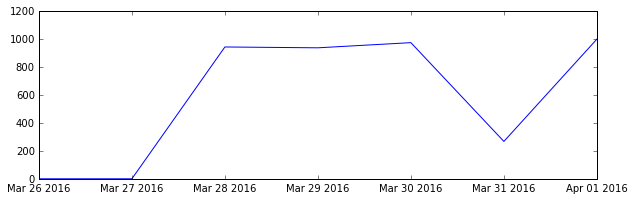

In [18]:
%matplotlib inline

d4 = c3Dictionary[('A002', 'R051', '02-00-00', '59 ST')]
dates = []
counts = []
for k in d4:
    dates += [k]
dates.sort()
for date in dates:    
    counts += [d4[date]]
    
print(dates)
print(counts)

plt.figure(figsize=(10,3))
plt.plot(dates,counts)

### Setting Up Pandas Dataframe

In [22]:
%%bash
wc -l turnstile*.txt

   194777 turnstile_160305.txt
   196534 turnstile_160312.txt
   191891 turnstile_160319.txt
   192947 turnstile_160326.txt
   194155 turnstile_160402.txt
   970304 total


In [23]:
import pandas as pd

dataset = ["turnstile_160402.txt", "turnstile_160326.txt", "turnstile_160319.txt", "turnstile_160312.txt", "turnstile_160305.txt"]

df = pd.read_csv(dataset[0])

for datafile in dataset[1:]:
    df = df.append(pd.read_csv(datafile), ignore_index = True)

In [27]:
df = df[df['ENTRIES']!=0]
print(df[df['ENTRIES']<100000]['UNIT'].count())
df.describe()

112961


,ENTRIES,EXITS
count,9.524980e+05,9.524980e+05
mean,3.507197e+07,2.867611e+07
std,1.943835e+08,1.756991e+08
min,1.000000e+00,0.000000e+00
25%,6.400502e+05,3.303922e+05
50%,2.634955e+06,1.530733e+06
75%,6.559656e+06,4.668594e+06
max,2.146697e+09,2.097168e+09


In [28]:
df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,00:00:00,REGULAR,5595746,1893277
1,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,04:00:00,REGULAR,5595746,1893282
2,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,08:00:00,REGULAR,5595746,1893282
3,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,12:00:00,REGULAR,5595746,1893282
4,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,16:00:00,REGULAR,5595746,1893282


In [30]:
import dateutil.parser
import datetime

ts_data1= {}
for name, group in df.groupby(['C/A','UNIT','SCP','STATION']):
    ts_data1[name] = group.iloc[:,4:]

#### Challenge 5

- So far we've been operating on a single turnstile level, let's
  combine turnstiles in the same ControlArea/Unit/Station combo. There
  are some ControlArea/Unit/Station groups that have a single
  turnstile, but most have multiple turnstilea-- same value for the
  C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each
ControlArea/UNIT/STATION combo, for each day, add the counts from each
turnstile belonging to that combo.

In [32]:
import dateutil.parser
import datetime

ts_data5= {}
for name, group in df.groupby(['C/A','UNIT','STATION']):
    ts_dt_val = {}
    for name2,group2 in group.groupby(['DATE']) :
        n = 0
        for name3,group3 in group2.groupby(['SCP']) :
            n += group3['ENTRIES'].max() - group3['ENTRIES'].min()
        ts_dt_val[ dateutil.parser.parse(name2)] = n
    ts_data5[name] =  ts_dt_val   

('N213', 'R154', 'TREMONT AV')
{datetime.datetime(2016, 3, 18, 0, 0): 10249, datetime.datetime(2016, 3, 21, 0, 0): 9953, datetime.datetime(2016, 3, 22, 0, 0): 10299, datetime.datetime(2016, 3, 4, 0, 0): 9937, datetime.datetime(2016, 3, 20, 0, 0): 4372, datetime.datetime(2016, 3, 8, 0, 0): 10208, datetime.datetime(2016, 2, 29, 0, 0): 9808, datetime.datetime(2016, 3, 25, 0, 0): 8097, datetime.datetime(2016, 3, 29, 0, 0): 10196, datetime.datetime(2016, 3, 23, 0, 0): 10211, datetime.datetime(2016, 3, 15, 0, 0): 10199, datetime.datetime(2016, 3, 28, 0, 0): 9377, datetime.datetime(2016, 3, 9, 0, 0): 10327, datetime.datetime(2016, 3, 11, 0, 0): 10083, datetime.datetime(2016, 3, 16, 0, 0): 10300, datetime.datetime(2016, 3, 17, 0, 0): 10277, datetime.datetime(2016, 3, 31, 0, 0): 10243, datetime.datetime(2016, 2, 27, 0, 0): 5565, datetime.datetime(2016, 3, 3, 0, 0): 10140, datetime.datetime(2016, 3, 19, 0, 0): 5765, datetime.datetime(2016, 3, 10, 0, 0): 10334, datetime.datetime(2016, 2, 28, 0, 0

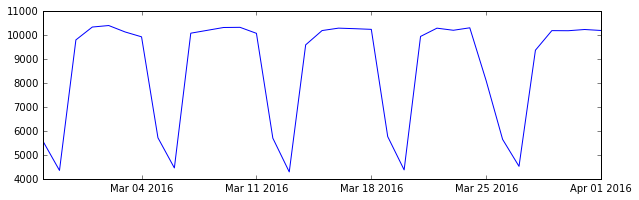

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

for key,val in ts_data5.items():
    if key[2] != 'TREMONT AV': continue
    print (key);  print(val)
    dates = sorted(list(val.keys()))
    counts=[]
    for date in dates:
        counts.append(val[date])
    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)
    break

#### Challenge 6

Similarly, combine everything in each station, and come up with a time
series of `[(date1, count1),(date2,count2),...]` type of time series
for each STATION, by adding up all the turnstiles in a station.

In [35]:
ts_data6= {}
for name, group in df.groupby(['STATION']):
    ts_dt_val = {}
    for name2,group2 in group.groupby(['DATE']) :
        n = 0
        for name3,group3 in group2.groupby(['C/A','UNIT','SCP']) :
            n += group3['ENTRIES'].max() - group3['ENTRIES'].min()
        ts_dt_val[ dateutil.parser.parse(name2)] = n
    ts_data6[name] =  ts_dt_val   

#### Challenge 7

Plot the time series for a station.

TREMONT AV
{datetime.datetime(2016, 3, 18, 0, 0): 10249, datetime.datetime(2016, 3, 21, 0, 0): 9953, datetime.datetime(2016, 3, 22, 0, 0): 10299, datetime.datetime(2016, 3, 4, 0, 0): 9937, datetime.datetime(2016, 3, 20, 0, 0): 4372, datetime.datetime(2016, 3, 8, 0, 0): 10208, datetime.datetime(2016, 2, 29, 0, 0): 9808, datetime.datetime(2016, 3, 25, 0, 0): 8097, datetime.datetime(2016, 3, 29, 0, 0): 10196, datetime.datetime(2016, 3, 23, 0, 0): 10211, datetime.datetime(2016, 3, 15, 0, 0): 10199, datetime.datetime(2016, 3, 28, 0, 0): 9377, datetime.datetime(2016, 3, 9, 0, 0): 10327, datetime.datetime(2016, 3, 11, 0, 0): 10083, datetime.datetime(2016, 3, 16, 0, 0): 10300, datetime.datetime(2016, 3, 17, 0, 0): 10277, datetime.datetime(2016, 3, 31, 0, 0): 10243, datetime.datetime(2016, 2, 27, 0, 0): 5565, datetime.datetime(2016, 3, 3, 0, 0): 10140, datetime.datetime(2016, 3, 19, 0, 0): 5765, datetime.datetime(2016, 3, 10, 0, 0): 10334, datetime.datetime(2016, 2, 28, 0, 0): 4350, datetime.da

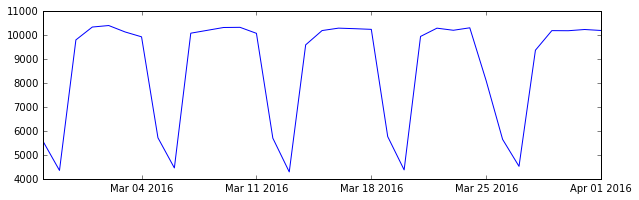

In [37]:
for key,val in ts_data6.items():
    if key != 'TREMONT AV': continue
    print (key);  print(val)
    dates = sorted(list(val.keys()))
    counts=[]
    for date in dates:
        counts.append(val[date])
    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)
    break

#### Challenge 8

- Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week.
`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.

In [38]:
d0 = dateutil.parser.parse('03/07/2016')
d1 = dateutil.parser.parse('03/14/2016')
d2 = dateutil.parser.parse('03/21/2016')
d3 = dateutil.parser.parse('03/28/2016')
list1 = [0,0,0,0,0,0,0]
list2 = [0,0,0,0,0,0,0]
list3 = [0,0,0,0,0,0,0]
#wkdays=['mon','tue','wed','thu','fri']
wkdays = list(range(7))

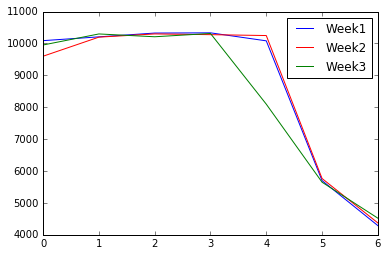

In [39]:
for key,val in ts_data6.items():
    if key != 'TREMONT AV': continue
#    print (key);  print(val)
    for k1,v1 in val.items():
        idx = k1.weekday()
        if k1 >=d0 and k1<d1: list1[idx] = v1
        elif k1 >=d1 and k1<d2: list2[idx] = v1
        elif k1 >=d2 and k1<d3: list3[idx] = v1
        else: pass
    plt.plot(wkdays,list1,'b-',label='Week1')
    plt.plot(wkdays,list2,'r-',label='Week2')
    plt.plot(wkdays,list3,'g-',label='Week3')
    plt.legend(loc='upper right')
    plt.show()
    break

#### Challenge 9

- Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate

In [40]:
ts_data9= {}
for name, group in df.groupby(['STATION']):
    n = 0
    for name2,group2 in group.groupby(['C/A','UNIT','SCP']) :
        n += group2['ENTRIES'].max() - group2['ENTRIES'].min()    
    ts_data9[name] =  n  

#### Challenge 10

- Make a single list of these total ridership values and plot it with

    plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among
different stations.

This should show you that most stations have a small traffic, and the
histogram bins for large traffic volumes have small bars.

*Additional Hint*:

If you want to see which stations take the meat of the traffic, you
can sort the total ridership counts and make a `plt.bar` graph. For
this, you want to have two lists: the indices of each bar, and the
values. The indices can just be `0,1,2,3,...`, so you can do

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)

373 7628 2131102095


(array([ 368.,    3.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,    1.]),
 array([  7.62800000e+03,   2.13117075e+08,   4.26226521e+08,
          6.39335968e+08,   8.52445415e+08,   1.06555486e+09,
          1.27866431e+09,   1.49177375e+09,   1.70488320e+09,
          1.91799265e+09,   2.13110210e+09]),
 <a list of 10 Patch objects>)

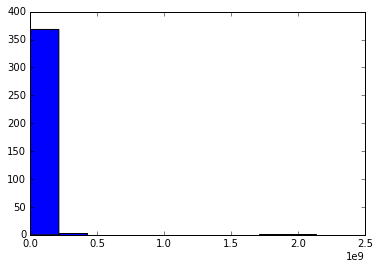

In [47]:
counts = [val for key,val in ts_data9.items()]
print(len(counts),min(counts),max(counts))
total_ridership_counts = counts

plt.hist(total_ridership_counts) 

<Container object of 373 artists>

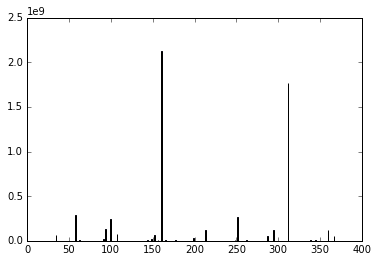

In [48]:
indices = range(len(counts))
plt.bar(indices, counts)

In [55]:
station_freq = [(key,val) for key,val in ts_data9.items()]
station_freq.sort(reverse=True, key=lambda x: x[1])

In [56]:
station_freq[0:10]

[('LORIMER ST', 2131102095),
 ('167 ST', 1772055996),
 ('45 ST', 285329830),
 ('36 ST', 269010154),
 ('34 ST-PENN STA', 239977882),
 ('8 ST-NYU', 134765808),
 ('14 ST-UNION SQ', 119916667),
 ('JAMAICA 179 ST', 118129398),
 ('COURT SQ', 117879346),
 ('23 ST', 70943438)]

In [57]:
#throwing away overly high entry counts
print(df[ df['ENTRIES'] < 100000].count() )
df = df[ df['ENTRIES'] > 100000]

C/A                                                                     112961
UNIT                                                                    112961
SCP                                                                     112961
STATION                                                                 112961
LINENAME                                                                112961
DIVISION                                                                112961
DATE                                                                    112961
TIME                                                                    112961
DESC                                                                    112961
ENTRIES                                                                 112961
EXITS                                                                   112961
dtype: int64


In [59]:
#reprinting top 10 with filtered data
ts_data9= {}
for name, group in df.groupby(['STATION']):
    n = 0
    for name2,group2 in group.groupby(['C/A','UNIT','SCP']) :
        n += group2['ENTRIES'].max() - group2['ENTRIES'].min()    
    ts_data9[name] =  n  
station_freq = [(key,val) for key,val in ts_data9.items()]
station_freq.sort(reverse=True, key=lambda x: x[1])
station_freq[0:10]

[('LORIMER ST', 2122716423),
 ('167 ST', 1772055989),
 ('36 ST', 268986387),
 ('34 ST-PENN STA', 239653376),
 ('14 ST-UNION SQ', 119823250),
 ('8 ST-NYU', 67656829),
 ('ATL AV-BARCLAY', 67157942),
 ('ELMHURST AV', 54689957),
 ('NASSAU ST', 50698158),
 ('47-50 STS ROCK', 35210295)]